# Tercera prueba para la detcción de plasticos en la arena
## Paso 1: Vamos a entrenar la red balanceando los datos de la clase mas pequeña y entrenar la red

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from os import scandir, getcwd
import random

In [2]:
df2 = pd.read_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/segmentosPlastico-3img.csv")

filtrado = df2['Nombre Segmento'].str.match(pat = '(imgID1)|(imgID2)|(imgID3)|(imgID3.2)') 
df3 = df2[filtrado]
df3 #Ya tenemos un dataframe donde solo se encuentran las imágenes mapeadas

,Nombre Segmento,Plasticos
0,imgID1-R0C0,0
1,imgID1-R0C1,0
2,imgID1-R0C2,0
3,imgID1-R0C3,0
4,imgID1-R0C4,0
5,imgID1-R0C5,0
6,imgID1-R0C6,0
7,imgID1-R0C7,0
8,imgID1-R0C8,0
9,imgID1-R0C9,0


In [5]:
def filtrado5img(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if (arch.is_file() 
                                                    and arch.name.endswith('.jpg') 
                                                    and (arch.name.startswith('imgID1')
                                                         or  arch.name.startswith('imgID2')
                                                         or  arch.name.startswith('imgID3')
                                                         or  arch.name.startswith('imgID3.2')))]


listImg = filtrado5img("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada\\2240x2240\Segmentadas")
len(listImg)

6125

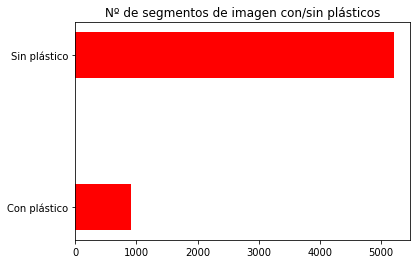

In [6]:
#Contamos cuantos fragmentos tenemos con/sin plásticos
unos = df3[df3['Plasticos'] == 1].count()
ceros = df3[df3['Plasticos'] == 0].count()

#Graficos de barras bonicos ---> https://plot.ly/matplotlib/bar-charts/
plt.barh(["Con plástico","Sin plástico"],[unos.values[0],ceros.values[0]],color="red",height=0.3)
plt.title("Nº de segmentos de imagen con/sin plásticos")

plt.show()

In [37]:
unosList = df3[df3['Plasticos'] == 1]['Nombre Segmento'].tolist()
cerosList = df3[df3['Plasticos'] == 0]['Nombre Segmento'].tolist()
random.shuffle(cerosList)
cerosListTrun = cerosList[:len(unosList)]
print(unosList[:3])
len(cerosList[:len(unosList)]) #Tenemos una lista de segmentos sin plastico aleatoria del mismo len que con plástico


['imgID1-R1C1', 'imgID1-R3C20', 'imgID1-R5C20']


909

In [81]:
random.shuffle(unosList)
X_trainList = cerosListTrun[:800] + unosList[:800]
random.shuffle(X_trainList)
X_testList = cerosListTrun[800:] + unosList[800:]
random.shuffle(X_testList)

#Para la Y buscamos cada elemento y dependiendo de en 
#que lista esté añadimos un 0 o un 1 a la lista

Y_train = []
for i in X_trainList:
    if i in cerosList : 
        Y_train.extend([0])
    else:
        Y_train.extend([1])


Y_test = []
for i in X_testList:
    if i in cerosList : 
        Y_test.extend([0])
    else:
        Y_test.extend([1])
        
#Array con todas las imágenes a entrenar 
X_train = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+img + ".jpg")) for img in X_trainList] )
print(X_train.shape)
X_test = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+img + ".jpg")) for img in X_testList] )
print(X_test.shape)


(1600, 64, 64, 3)
(218, 64, 64, 3)


In [82]:
#Normalizamos la imagen
X_train= X_train / 255.0
X_test= X_test / 255.0
print(X_train.shape)
print(X_test.shape)

(1600, 64, 64, 3)
(218, 64, 64, 3)


### Paso 1.2 Creación de la red neuronal y entrenamiento

In [42]:
from keras.models                import Sequential, Model
from keras.layers                import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.layers                import Conv2DTranspose, UpSampling2D, MaxPooling2D, Reshape, Activation, ReLU
from keras.preprocessing.image   import ImageDataGenerator
from keras.utils                 import to_categorical
from keras.optimizers            import SGD

Using TensorFlow backend.


In [83]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(64, 64,3)))
model.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
model.add(Activation('relu'))

model.add(Flatten())  
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [84]:
model.fit(X_train, Y_train,  batch_size=32, epochs=10)

Epoch 1/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.6883 - acc: 0.5587
Epoch 2/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.6661 - acc: 0.6200
Epoch 3/10
1600/1600 [==============================] - 9s 5ms/step - loss: 0.6177 - acc: 0.6606
Epoch 4/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.5829 - acc: 0.6875
Epoch 5/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.5374 - acc: 0.7181
Epoch 6/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.4541 - acc: 0.7919A: 5s - loss: 0.457 - ETA: 2s - loss: 0.459
Epoch 7/10
1600/1600 [==============================] - 9s 5ms/step - loss: 0.3299 - acc: 0.8594A: 2s - loss: 0.3084 -
Epoch 8/10
1600/1600 [==============================] - 9s 5ms/step - loss: 0.2459 - acc: 0.9062A: 1s - loss: 0.2387 - a
Epoch 9/10
1600/1600 [==============================] - 9s 5ms/step - loss: 0.1613 - acc: 0.9437
Epoch 10/10
1600/1600 [===============

In [85]:
print("---Evaluacion----")
ev = model.evaluate(X_test, Y_test, batch_size=32)
print(ev) #ev_loss - ev_acc

---Evaluacion----
218/218 [==============================] - 1s 3ms/step
[0.72740206259106277, 0.7889908267817366]


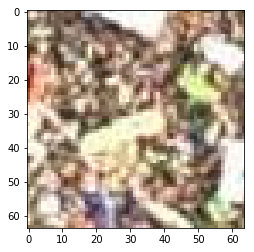

array([[ 0.00483335]], dtype=float32)

In [91]:
ejemplo = np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/imgID8-R20C15.jpg"))
plt.imshow(ejemplo)
plt.show()

prueba = ejemplo[np.newaxis,:]/255
#prueba.shape
model.predict(prueba)

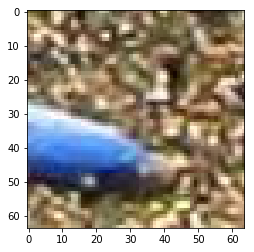

array([[ 0.00612791]], dtype=float32)

In [92]:
ejemplo = np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/imgID1-R25C23.jpg"))
plt.imshow(ejemplo)
plt.show()

prueba = ejemplo[np.newaxis,:]/255
#prueba.shape
model.predict(prueba)

In [97]:
plasticosList = []
for i in X_testList:
    if i in unosList : 
        plasticosList.extend([i])
plasticos = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+img + ".jpg")) for img in plasticosList] )
print(plasticos.shape)

plasticos = plasticos/255
Y_plasticos = np.ones((len(plasticosList),),dtype=int)
print(Y_plasticos)
print("\n------Evaluación para imágenes con solo plastico conjunto test--------")
ev3 = model.evaluate(plasticos,Y_plasticos, batch_size=32)
print(ev3) #ev_loss - ev_acc

(109, 64, 64, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

------Evaluación para imágenes con solo plastico conjunto test--------
109/109 [==============================] - 0s 2ms/step
[0.48094879815337854, 0.8532110097211435]


In [101]:
arenaList = []
for i in X_testList:
    if i in cerosList : 
        arenaList.extend([i])
arena = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+img + ".jpg")) for img in arenaList] )
print(arena.shape)

arena = arena/255
Y_arena= np.zeros((len(arenaList),),dtype=int)
print(Y_arena)
print("\n------Evaluación para imágenes con arena conjunto test--------")
ev3 = model.evaluate(arena,Y_arena, batch_size=32)
print(ev3) #ev_loss - ev_acc

(109, 64, 64, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

------Evaluación para imágenes con arena conjunto test--------
109/109 [==============================] - 0s 2ms/step
[0.97385535983864324, 0.72477064438916128]


In [89]:
unos = df3[df3['Plasticos'] == 1]
print(unos.head())
im_array = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+img+".jpg")) for img in unos['Nombre Segmento'].tolist()] )

print("\nLas dimensiones del array son: ", im_array.shape)

X_eval = im_array/255
Y_eval = unos['Plasticos'].values

print("\n------Evaluación para imágenes con solo plastico--------")
ev3 = model.evaluate(X_eval,Y_eval, batch_size=32)
print(ev3) #ev_loss - ev_acc

    Nombre Segmento  Plasticos
36      imgID1-R1C1          1
125    imgID1-R3C20          1
195    imgID1-R5C20          1
196    imgID1-R5C21          1
197    imgID1-R5C22          1

Las dimensiones del array son:  (909, 64, 64, 3)

------Evaluación para imágenes con solo plastico--------
909/909 [==============================] - 2s 2ms/step
[0.15363790460414486, 0.95049504970166554]


In [90]:
unos = df3[df3['Plasticos'] == 0]
print(unos.head())
im_array = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+img+".jpg")) for img in unos['Nombre Segmento'].tolist()] )

print("\nLas dimensiones del array son: ", im_array.shape)

X_eval = im_array/255
Y_eval = unos['Plasticos'].values

print("\n------Evaluación para imágenes con arena--------")
ev3 = model.evaluate(X_eval,Y_eval, batch_size=32)
print(ev3) #ev_loss - ev_acc

  Nombre Segmento  Plasticos
0     imgID1-R0C0          0
1     imgID1-R0C1          0
2     imgID1-R0C2          0
3     imgID1-R0C3          0
4     imgID1-R0C4          0

Las dimensiones del array son:  (5216, 64, 64, 3)

------Evaluación para imágenes con arena--------
5216/5216 [==============================] - 13s 2ms/step
[0.61691742920619574, 0.81671779141104295]


## Paso 2: Aumentar los datos para entrenar la red con más datos y estando las clases balanceadas